Realiza la conexión en Python con MySQL Workbench para cargar toda la información que tienes en las tablas.

Realizarás una visualización para cada ejercicio. Comenta lo que llama la atención de graficar esta variable, justifica la elección del gráfico e interpreta los resultados en función de tus datos.

In [1]:
import matplotlib.pyplot as plt # mando llamar todo 
import numpy as np
import pymysql
import pandas as pd
import seaborn as sns
import re
import webcolors

# Ejercicio 1
Una variable numérica.

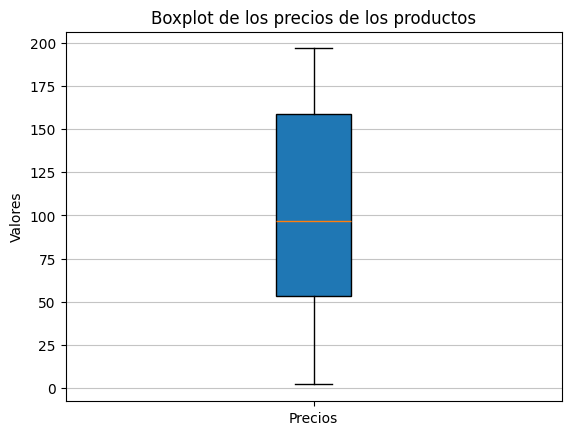

In [2]:

miconector = pymysql.connect(host='localhost', user='root', passwd='Fec931412.', db='sprint4') # conexion a la base de datos
cur = miconector.cursor() # creo un cursor (variable) para poder ejecutar comandos en la base de datos
cur.execute('SELECT price FROM products')# comando sql
data = cur.fetchall() # guardo los datos en una variable
miconector.close() # cierro la conexion a la base de datos
data = np.array(data) # convierto los datos en un array de numpy
datalimpio = np.array([float(price[0].replace('$', '')) for price in data])# elimino los $ y convierto a float para poder graficar


#print(datalimpio)
#print(data)

plt.boxplot(datalimpio, vert=True, patch_artist=True) # vert=True para que la caja sea vertical, patch_artist=True para que la caja tenga color y no sea solo una linea
plt.title('Boxplot de los precios de los productos')
plt.xticks([1], ['Precios']) # posiciono la etiqueta de los precios en el eje x
plt.ylabel('Valores') # para que aparezca etiqueta valores en el eje y
plt.grid(axis='y', alpha=0.75)# para que aparezcan las lineas en el eje y aparte de hacerlas algo transparentes
plt.show()


## Justificación 
Elegi este grafico ya que solo tengo una variavle numérica y este permite compararla no contra otras si no contra si misma teniendo la mediana los cuartiles y los bigotes (max,min).

# Ejercicio 2
Dos variables numéricas. price amount transaction

C:\Users\fabio\AppData\Local\Temp\ipykernel_24992\3403040839.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  transacciones = pd.read_sql('SELECT * FROM transactions', miconector)
C:\Users\fabio\AppData\Local\Temp\ipykernel_24992\3403040839.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  productos = pd.read_sql('SELECT * FROM products', miconector)
C:\Users\fabio\AppData\Local\Temp\ipykernel_24992\3403040839.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  transacciones_productos = pd.read_sql('SELECT * FROM trans

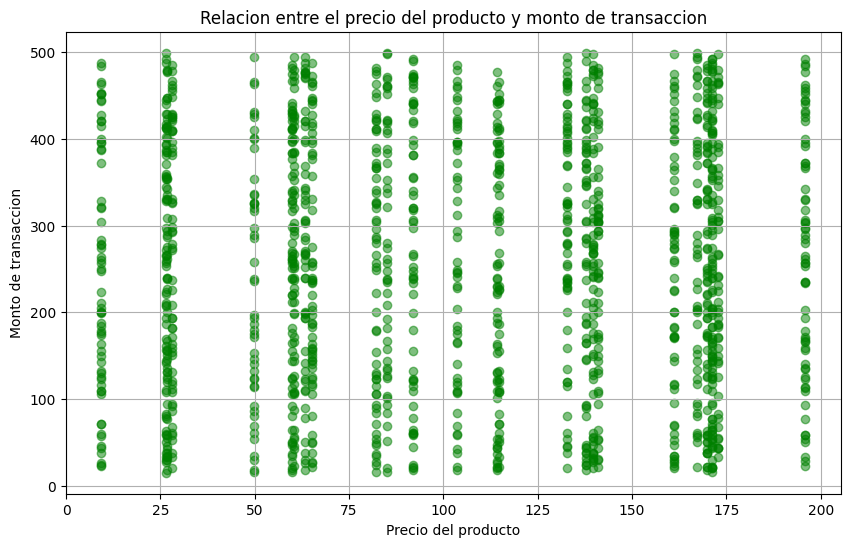

           price    amount
price   1.000000  0.011335
amount  0.011335  1.000000


In [3]:
miconector = pymysql.connect(host='localhost', user='root', passwd='Fec931412.', db='sprint4') 
transacciones = pd.read_sql('SELECT * FROM transactions', miconector)
productos = pd.read_sql('SELECT * FROM products', miconector)
transacciones_productos = pd.read_sql('SELECT * FROM transaction_products', miconector)
miconector.close()
df = transacciones.merge(transacciones_productos, left_on='id', right_on='transaction_id') \
                  .merge(productos, left_on='product_id', right_on='id') #enlazo las tablas hay que estar atentos a los nombres de las PK y FK
df['price'] = df['price'].apply(lambda x: float(x.replace('$', '')) ) # convierto los precios en float y quitando el signo de dolar otravez (seria conveniente cambiarlos en la base de datos)
#print(df.head())  # Para ver las primeras filas del dataframe pues sale vacio
#print(df.shape)   # Para ver cuántas filas tiene
plt.figure(figsize=(10, 6))
plt.scatter(df['price'], df['amount'], alpha=0.5, c = 'green') # grafico de dispersion
plt.title('Relacion entre el precio del producto y monto de transaccion')
plt.xlabel('Precio del producto')
plt.ylabel('Monto de transaccion')
plt.grid(True)
plt.show()
correlation = df[['price', 'amount']].corr()
print(correlation) # imprimo la correlacion entre las dos variables para saber si esta exixte o no

## interpretacion
despues de ver el grafico, y el resultado de coorelacion de las variables (cercano a 0) queda claro que no exixte ninguna tendencia entre el precio de los articulos y el monto de venta , esto se puede entender como que los clientes pueden gastar mucho o poco en una compra, independientemente de si los productos comprados son caros o baratos

## Ejercicio 3
Una variable categórica.

declined
0    500
1     87
Name: count, dtype: int64


C:\Users\fabio\AppData\Local\Temp\ipykernel_24992\2997343594.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  transacciones = pd.read_sql('SELECT * FROM transactions', miconector)


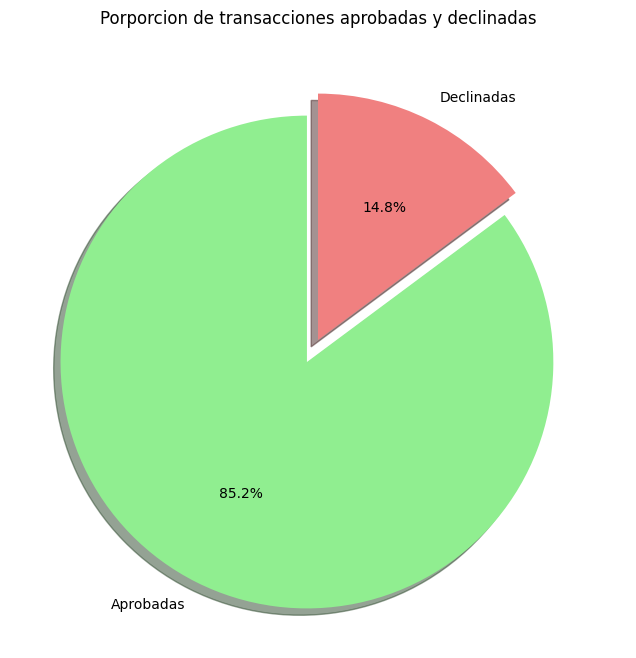

In [4]:
miconector = pymysql.connect(host='localhost', user='root', passwd='Fec931412.', db='sprint4') 
transacciones = pd.read_sql('SELECT * FROM transactions', miconector)
miconector.close()
cuentadeclinadas = transacciones['declined'].value_counts() # cuento cuantas transacciones fueron declinadas
print(cuentadeclinadas)
etiquetas = ['Aprobadas', 'Declinadas'] # hay que respetar el orden en el que aparecen los datos si no te sale al reves
plt.figure(figsize=(15, 8))
plt.pie(cuentadeclinadas, labels=etiquetas, autopct='%1.1f%%', shadow=True, colors=['lightgreen','lightcoral'],  startangle=90, explode=(0.1,0)) # grafico de pastel
plt.title('Porporcion de transacciones aprobadas y declinadas')
plt.show()

## Conclusión
Tendria que evalusrse si el 15.2 # de transacciones declinadas es algo que preocupe a la empresa pues da la impresión de ser algo alto.

## Ejercicio 4
Una variable categórica y una numérica.

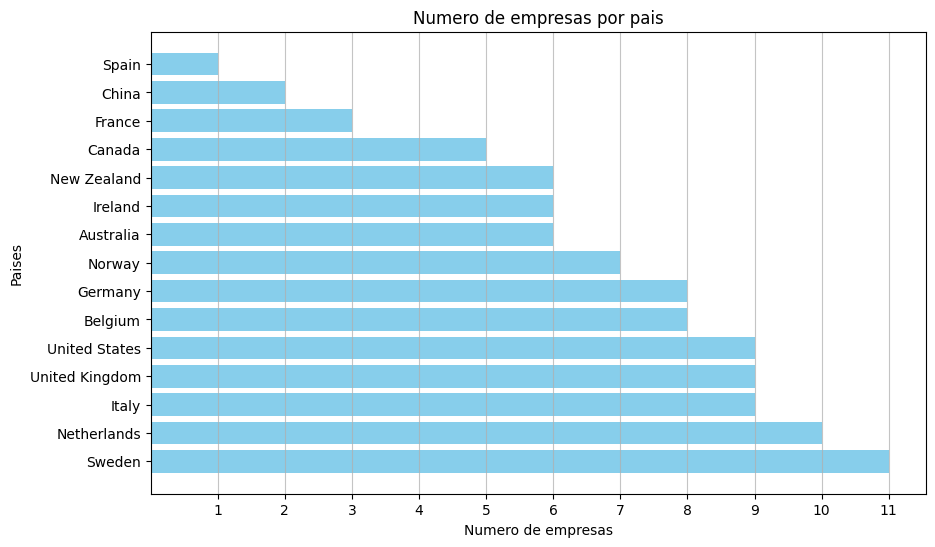

In [5]:
miconector = pymysql.connect(host='localhost', user='root', passwd='Fec931412.', db='sprint4') 
cur = miconector.cursor() 
cur.execute('SELECT count(distinct buisness_id), country FROM transactions JOIN companies ON buisness_id = company_id GROUP BY country ORDER BY count(distinct buisness_id) DESC')
data = cur.fetchall() 
miconector.close() 
#print(data)
plt.figure(figsize=(10, 6))
plt.barh([country[1] for country in data], [count[0] for count in data], color='skyblue') # grafico de barras
plt.title('Numero de empresas por pais')
plt.xlabel('Numero de empresas')
plt.ylabel('Paises')
max_count = max([count[0] for count in data])  # saco el número máximo de empresas para que me cuente de 1 en 1
plt.xticks(range(1, max_count + 1, 1))  # Mostrar ticks de 1 en 1
plt.grid(axis='x', alpha=0.75)
plt.show()


## Perspectivas
En este grafico se ve claramente que hay mercados en los que se podria crecer aumentando el numero de clientes para que se acerquen mas a la media.

## Ejercicio 5
Dos variables categóricas.

C:\Users\fabio\AppData\Local\Temp\ipykernel_24992\1478774435.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  transacciones = pd.read_sql_query('SELECT * FROM transactions', miconector)
C:\Users\fabio\AppData\Local\Temp\ipykernel_24992\1478774435.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  compañias = pd.read_sql_query('SELECT * FROM companies', miconector)


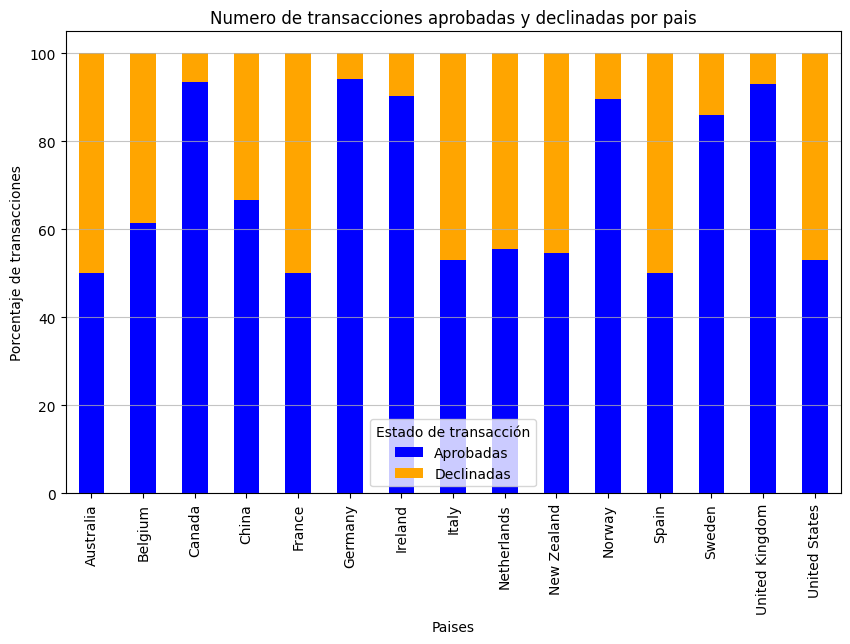

In [6]:
miconector = pymysql.connect(host='localhost', user='root', passwd='Fec931412.', db='sprint4') 
transacciones = pd.read_sql_query('SELECT * FROM transactions', miconector)
compañias = pd.read_sql_query('SELECT * FROM companies', miconector)
miconector.close()
df_tr_com = transacciones.merge(compañias, left_on='buisness_id', right_on='company_id') # join de las tablas
agrupadas = df_tr_com.groupby(['country', 'declined']).size().unstack() # agrupo por pais y cuento (.size()) y desapilo (.unstack()) para que me quede en dos columnas
agrupadas = agrupadas.fillna(0) # lleno los valores NaN con 0
agrupadas.columns = ['Aprobadas', 'Declinadas'] # renombro las columnas
porcentaje = agrupadas.div(agrupadas.sum(axis=1), axis=0) * 100 # saco el porcentaje para que este en función de 100% y no por numero de transacciones
porcentaje.plot(kind='bar', stacked=True,figsize=(10,6) ,color=['blue','orange']) # grafico de barras apiladas
plt.title('Numero de transacciones aprobadas y declinadas por pais')
plt.xlabel('Paises')
plt.ylabel('Porcentaje de transacciones')  
plt.legend(title='Estado de transacción') 
plt.grid(axis='y', alpha=0.75)

plt.show()  

## Conclusion
En este grafico se puede observar el porcentaje de transacciones aprobadas y declinadas por cada país, decidi hacerlo en porcentaje y no por cantidad pues hay mucha diferencia entre el numero de transacciones entre paises y eso dificultaba la visualización, ademas asi puede verse claramente que hay hasta 7 paises que tienen el 50% de sus transaccione rechazadas, lo que amerita una accion para corregirlo. 

## Ejercicio 6
Tres variables.

C:\Users\fabio\AppData\Local\Temp\ipykernel_24992\3509732508.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  transacciones = pd.read_sql_query('SELECT * FROM transactions', miconector)
C:\Users\fabio\AppData\Local\Temp\ipykernel_24992\3509732508.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  users = pd.read_sql_query('SELECT * FROM users', miconector)


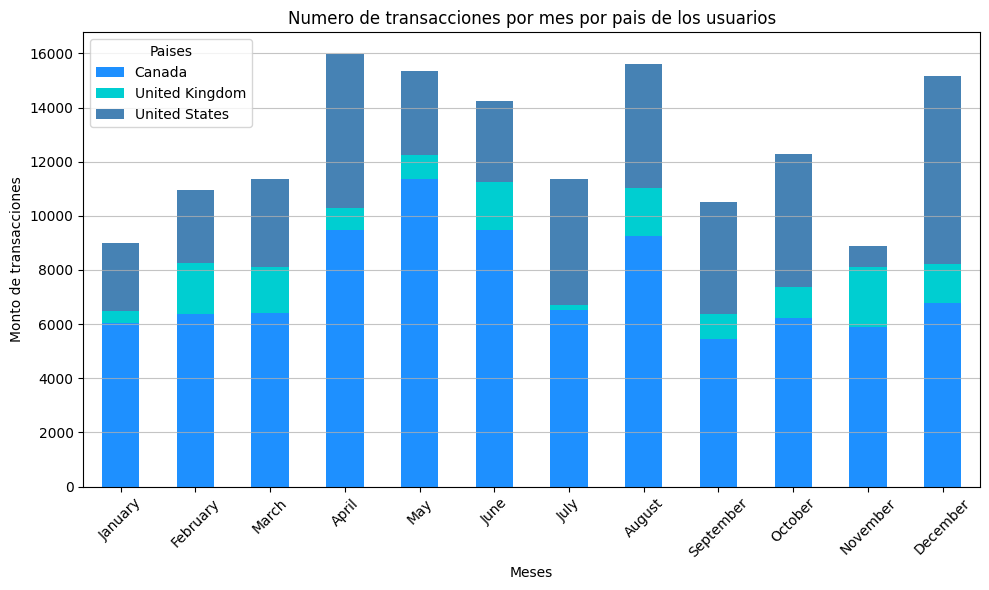

In [7]:
miconector = pymysql.connect(host='localhost', user='root', passwd='Fec931412.', db='sprint4') 
transacciones = pd.read_sql_query('SELECT * FROM transactions', miconector)
users = pd.read_sql_query('SELECT * FROM users', miconector)
miconector.close()
df_tr_us = transacciones.merge(users, left_on='user_id', right_on='id') 
mes = pd.to_datetime(df_tr_us['timestamp']).dt.month_name() # saco el nombre del mes
df_tr_us['mes'] = mes # creo una nueva columna con el nombre del mes
agrupar = df_tr_us.groupby(['country','mes'])['amount'].sum().reset_index() # agrupo por pais y mes y sumo el monto
agrupar.columns = ['Pais', 'Mes', 'Monto'] # renombro las columnas solo para entender mejor y mas ordenado
meses_ordenados = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'] # referencia del orden de los meses
agrupar['Mes'] = pd.Categorical(agrupar['Mes'], categories=meses_ordenados, ordered=True) # hago que los meses esten ordenados
agrupar_pivoteado = agrupar.pivot(index='Mes', columns='Pais', values='Monto') # hago un pivot para que me quede en dos columnas
agrupar_pivoteado.plot(kind='bar', stacked=True,figsize=(10,6) ,color=['#1E90FF', '#00CED1', '#4682B4', '#5F9EA0']) # grafico de barras apiladas
plt.title('Numero de transacciones por mes por pais de los usuarios')   
plt.ylabel('Monto de transacciones')
plt.xlabel('Meses')
plt.legend(title='Paises')
plt.xticks(rotation=45) # se lee mejor inclinados creo
plt.tight_layout() # para que no se corten las etiquetas
plt.grid(axis='y', alpha=0.75) 
plt.show()




## Análisis
En el gráfico podemos ver claramente no solo la cantidad de ventas mensuales por país al que pertenecen los usuarios, sino también la proporción que tienen en las ventas acumuladas del mes. Queda claro de inmediato que las principales ventas se sitúan en Canadá, seguido de cerca por USA, y bastante atrás se queda UK, que consistentemente compra mucho menos que los otros dos. En noviembre, sin embargo, hay un cambio de tendencia: USA baja bastante las ventas y UK las sube y lo supera, pero en general es el peor mes.


## Ejercicio 7
Graficar un Pairplot.

intento fallido e conseguir el color a partir del hexadecimal, la columna colours no contiene hexas que correspondan a colores.

In [8]:
def color_codigo_nobre(color_hexadecimal):
    try:
        return webcolors.hex_to_name(color_hexadecimal)
    except ValueError:
        return color_hexadecimal
colores = ['#000000', '#FFFFFF', '#FF0000', '#00FF00', '#0000FF', 
           '#FFFF00', '#00FFFF', '#FF00FF', '#808080', '#FFA500', 
           '#A52A2A', '#90EE90', '#ADD8E6', '#FFC0CB', '#EE82EE']

# Probar la función
for color in colores:
    print(f"{color}: {color_codigo_nobre(color)}")

#000000: black
#FFFFFF: white
#FF0000: red
#00FF00: lime
#0000FF: blue
#FFFF00: yellow
#00FFFF: cyan
#FF00FF: magenta
#808080: gray
#FFA500: orange
#A52A2A: brown
#90EE90: lightgreen
#ADD8E6: lightblue
#FFC0CB: pink
#EE82EE: violet


C:\Users\fabio\AppData\Local\Temp\ipykernel_24992\3511739797.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  transacciones = pd.read_sql_query('SELECT * FROM transactions', miconector)
C:\Users\fabio\AppData\Local\Temp\ipykernel_24992\3511739797.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  productos = pd.read_sql_query('SELECT * FROM products', miconector)
C:\Users\fabio\AppData\Local\Temp\ipykernel_24992\3511739797.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  usuarios = pd.read_sql_query('SELECT * FROM us

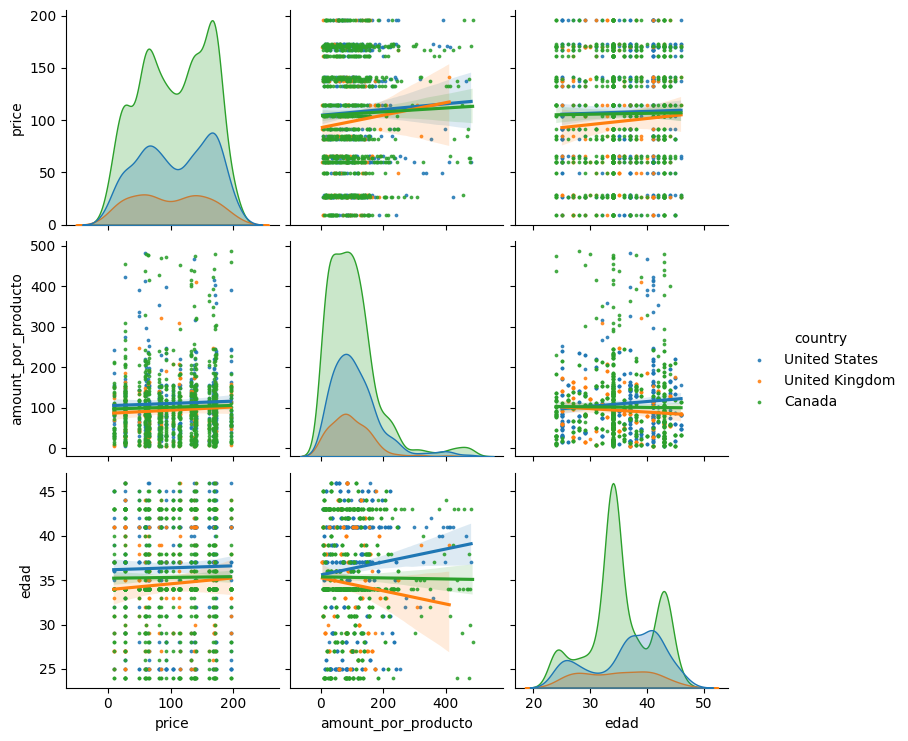

In [ ]:
miconector = pymysql.connect(host='localhost', user='root', passwd='Fec931412.', db='sprint4') 
transacciones = pd.read_sql_query('SELECT * FROM transactions', miconector)
productos = pd.read_sql_query('SELECT * FROM products', miconector)
usuarios = pd.read_sql_query('SELECT * FROM users', miconector)
miconector.close()
productos['warehouse_id'] = productos['warehouse_id'].apply(lambda x:'' .join(re.findall(r'\d+',x)) ) # extraigo los numeros de la columna warehouse_id pues tenian formato inconsistente
transacciones['numero_productos'] = transacciones['product_ids'].apply(lambda x: len(re.findall(r'\d+', x))) # cuento cuantos productos hay en cada transaccion
productos['price'] = productos['price'].apply(lambda x: float(x.replace('$', '')) ) #quito el $ y convierto a float
usuarios ['birth_date'] = pd.to_datetime(usuarios['birth_date']) # convierto la fecha de nacimiento en datetime
usuarios['edad'] = 2025 - usuarios['birth_date'].dt.year # calculo la edad
trans_a_products=transacciones.merge(transacciones_productos, left_on='id', right_on='transaction_id') \
                  .merge(productos, left_on='product_id', right_on='id') # hago un join de las tablas tomando la tabla intermedia
trans_a_products['amount_por_producto']= trans_a_products['amount']/trans_a_products['numero_productos'] # divido el monto entre el numero de productos
df_tr_pr_us = trans_a_products.merge(usuarios, left_on='user_id', right_on='id')
sns.pairplot(df_tr_pr_us[['price', 'amount_por_producto', 'edad','country']], hue='country', kind='reg', plot_kws={'scatter_kws' :{'s':3}}) # grafico de pares





# Nivel 2
## Ejercicio 1
Correlación de todas las variables numéricas.

Text(0.5, 1.0, 'Matriz de correlacion')

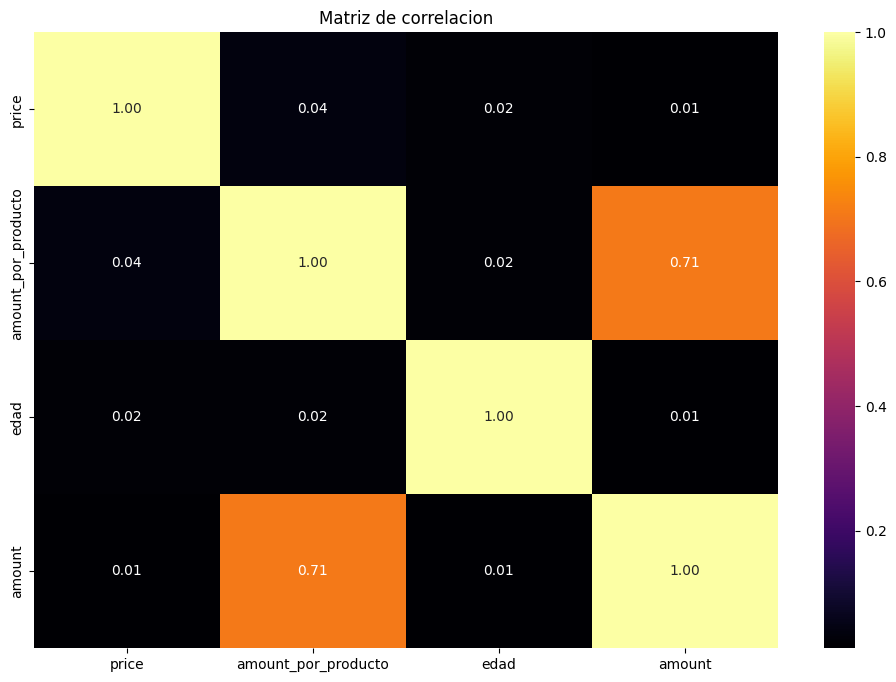

In [10]:
para_matrix = df_tr_pr_us[['price', 'amount_por_producto', 'edad', 'amount']] # selecciono las columnas que me interesan
matriz_correlacion = para_matrix.corr() # calculo la matriz de correlacion
plt.figure(figsize=(12, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='inferno',fmt=".2f") # grafico de calor
plt.title('Matriz de correlacion')


## Ejericio 2
Implementa un jointplot.

<Figure size 1500x1000 with 0 Axes>

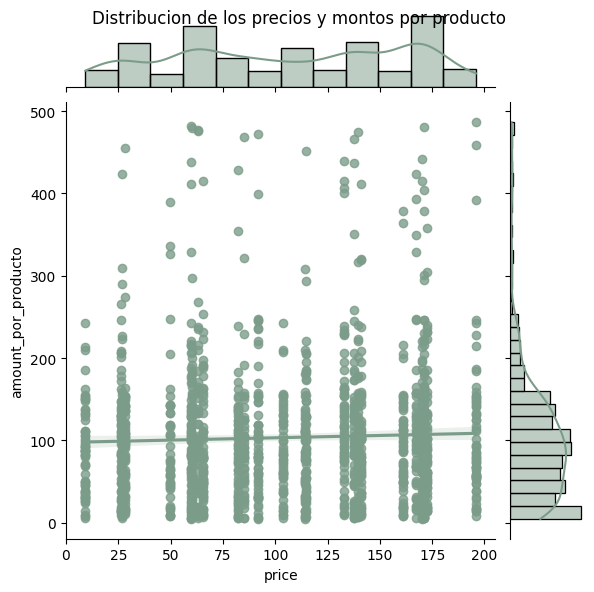

In [11]:

plt.figure(figsize=(15, 10))
join_plot = sns.jointplot(x='price', y='amount_por_producto', data=df_tr_pr_us, kind='reg', color='#7C9C8A') # grafico de hexagonos
join_plot.fig.suptitle('Distribucion de los precios y montos por producto')
plt.show()

# Nivel 3
## Ejercicio 1
Inplementa un violinplot combinado con otro tipo de grafico.

C:\Users\fabio\AppData\Local\Temp\ipykernel_24992\1006352481.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_tr_com2, x='amount', y='country', palette='viridis',inner='quartile', ax=ax1) # grafico de violin


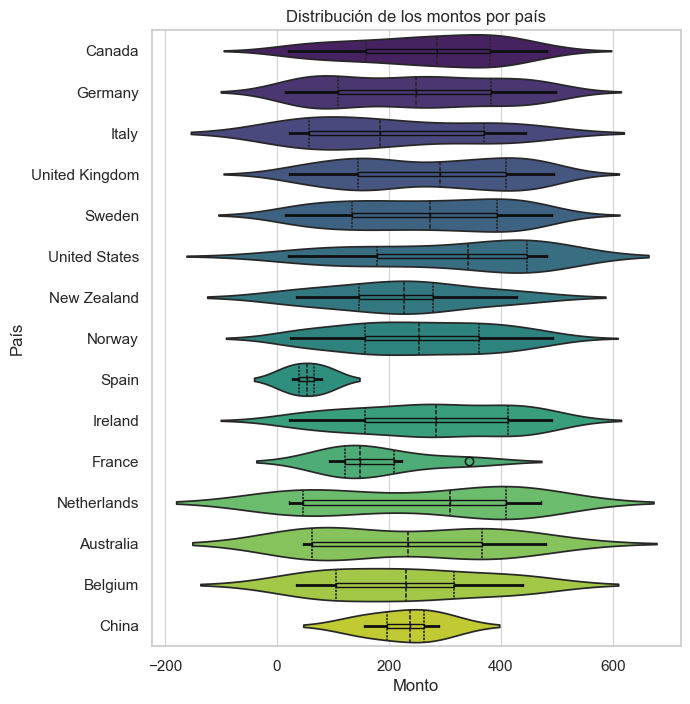

C:\Users\fabio\AppData\Local\Temp\ipykernel_24992\1006352481.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_tr_com2, x='numero_productos', y='country', palette='plasma', inner=None, density_norm='width',ax=ax2) # grafico de violin con los puntos
C:\Users\fabio\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:3399: UserWarning: 54.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\fabio\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:3399: UserWarning: 76.3% of the points cannot be placed; you may want to decrease the size of the marker

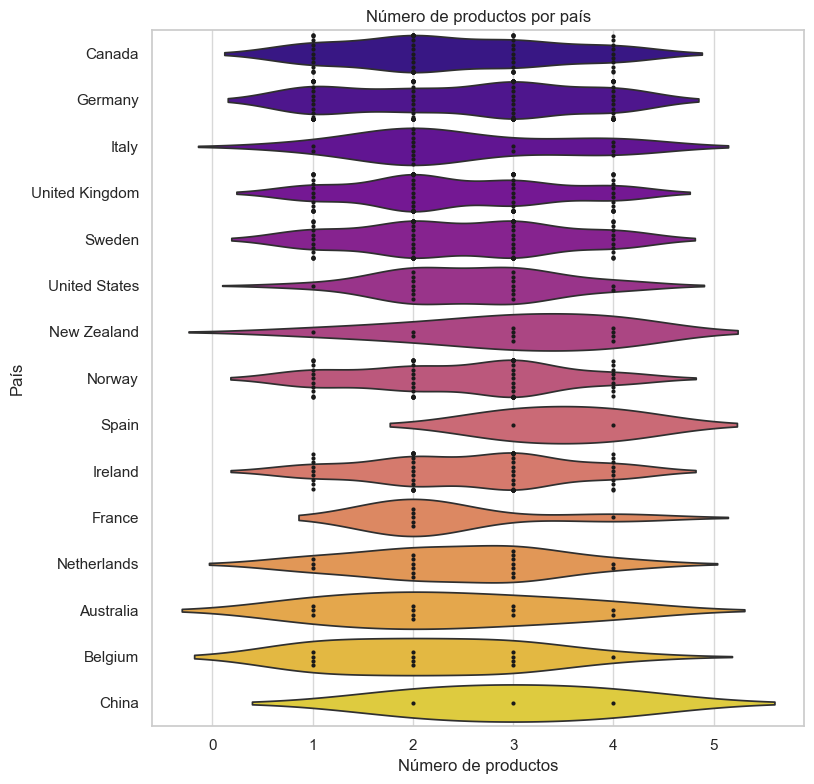

In [36]:
df_tr_com2 = transacciones.merge(compañias, left_on='buisness_id', right_on='company_id') # join de las tablas, posterior a algunos cambios que me interesa conservar
sns.set(style='whitegrid') # estilo de la grafica                                                                       
plt.figure(figsize=(15, 8))
ax1 = plt.subplot(1, 2, 1) # creo un subplot para poder graficar dos graficos en una sola ventana
sns.violinplot(data=df_tr_com2, x='amount', y='country', palette='viridis',inner='quartile', ax=ax1) # grafico de violin
sns.boxplot(data=df_tr_com2, x='amount', y='country', width=0.1, color='k',
            showcaps=True, boxprops={'facecolor':'None'}, whiskerprops={'linewidth':2}, ax=ax1)
ax1.set_title('Distribución de los montos por país')
ax1.set_xlabel('Monto')
ax1.set_ylabel('País')
plt.grid(axis='x', alpha=0.75)
plt.show()
plt.figure(figsize=(15, 8))
ax2 = plt.subplot(1, 2, 2)
sns.violinplot(data=df_tr_com2, x='numero_productos', y='country', palette='plasma', inner=None, density_norm='width',ax=ax2) # grafico de violin con los puntos
sns.swarmplot(data=df_tr_com2, x='numero_productos', y='country', color='k', size=3,ax=ax2)
ax2.set_title('Número de productos por país')
ax2.set_xlabel('Número de productos')
ax2.set_ylabel('País')
plt.grid(axis='x', alpha=0.75)
plt.tight_layout()
plt.show()


## Ejercicio 2
Genera un FacetGrid para visualizar multiples aspectos de los datos simultaneamente.

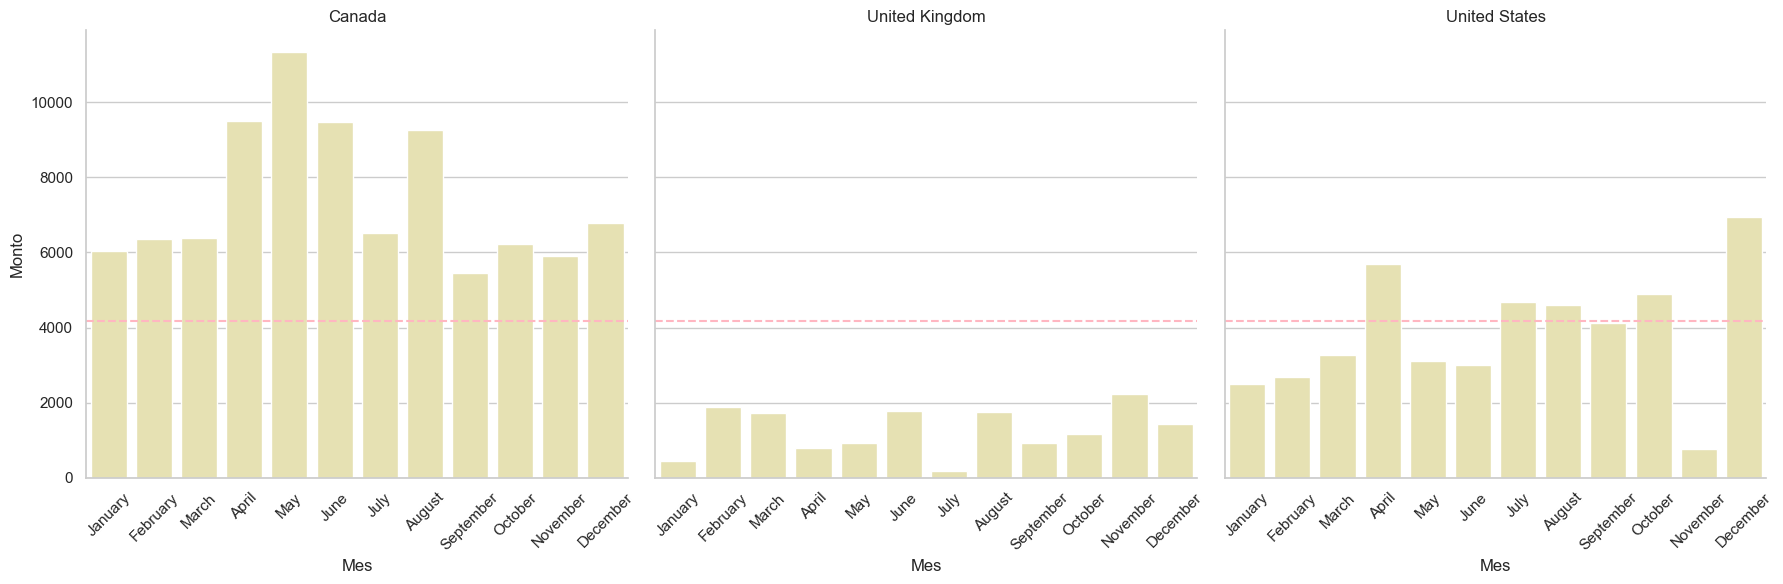

In [ ]:
agrupar['Mes'] =pd.Categorical(agrupar['Mes'], categories=meses_ordenados, ordered=True) 
#print(agrupar)

grafico = sns.FacetGrid(agrupar, col='Pais',col_wrap=3, height=6, aspect=1) # creo una matriz de graficos y los guardo en una variavle
grafico.map_dataframe(sns.barplot, x='Mes', y='Monto', color='#EEE8AA') 
grafico.refline(y=agrupar['Monto'].mean(), linestyle='--', color='#FFB6C1') # linea de referencia
#grafico.xticks(rotation=45)
for ax in grafico.axes.flat:
    ax.tick_params(axis='x', rotation=45)# todo esto para rotar los nombres de los meses esto esta mal
grafico.set_axis_labels('Mes','Monto') 
grafico.set_titles('{col_name}') # titulo de cada grafico con el nombre que corresponde a cada columna
plt.tight_layout() 

